# Vasiliki Kostara, Chapter 5: Brownian Dynamics, Homework 2

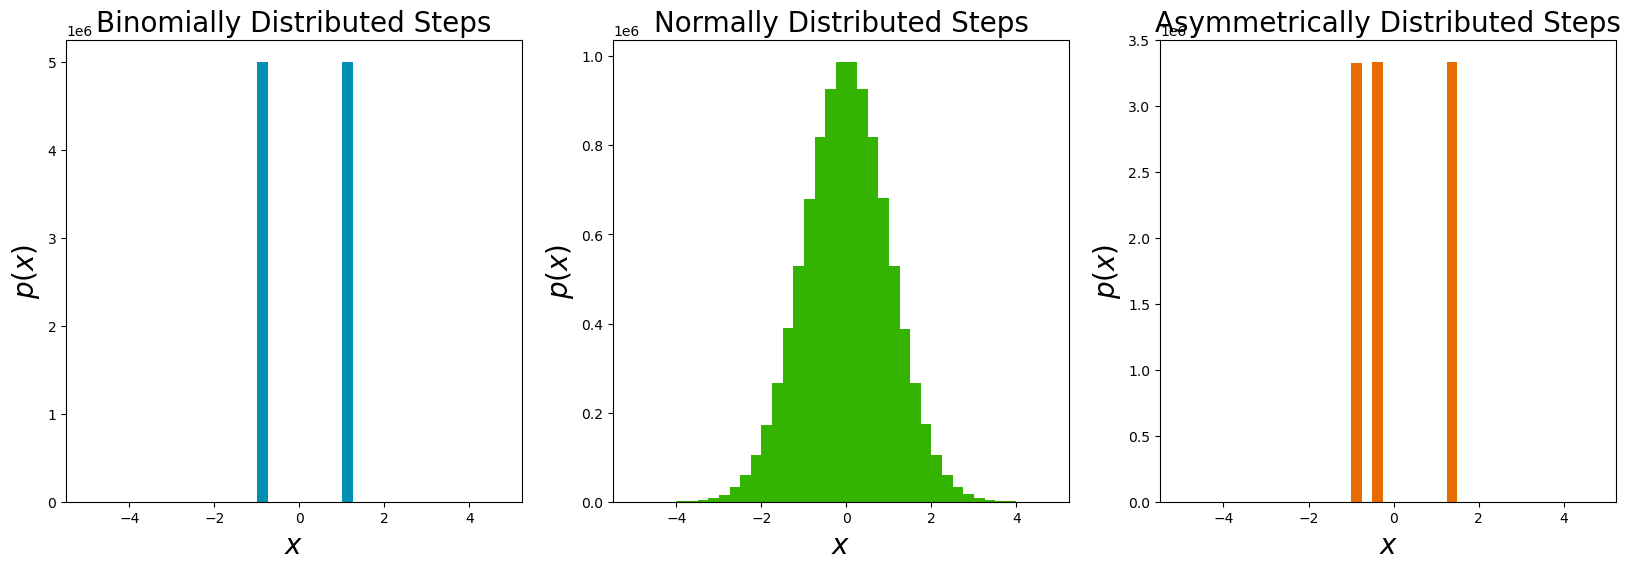

In [37]:
# 5.1. a)
import numpy as np 
from matplotlib import pyplot as plt 

cases = ['Binomially Distributed Steps', 'Normally Distributed Steps', 'Asymmetrically Distributed Steps']
frac_minus = (1 - np.sqrt(3))/2
frac_plus = (1 + np.sqrt(3))/2
N = 1000                                                           # Number of time steps
n = 10000                                                          # Number of agents(polupation/particles/cases etc)
r1 = np.random.choice([-1,1], size=(N,n))                          # Trajectories with a Bernoulli distribution
r2 = np.random.randn(N,n)                                          # Trajectories with a Gaussian distribution 
r3 = np.random.choice([-1, frac_minus, frac_plus], size=(N,n))     # Trajectories with assymetric steps, 33.3% -1, 33.3% frac-, 33.3% frac+
C = ['#0090B3','#34B400','#E66C00']


plt.figure(figsize=(20,6))
l = np.arange(40)/4 - 5
for subplot, sequences in zip([1,2,3], [r1,r2,r3]):    
    plt.subplot(1,3,subplot)
    plt.hist(sequences.reshape(sequences.size,),l,color=C[subplot-1])
    plt.xlabel(r"$x$",fontsize=20)
    plt.ylabel(r"$p(x)$",fontsize=20)
    plt.title(cases[subplot-1], fontsize=20)

# the distributions are not normalized

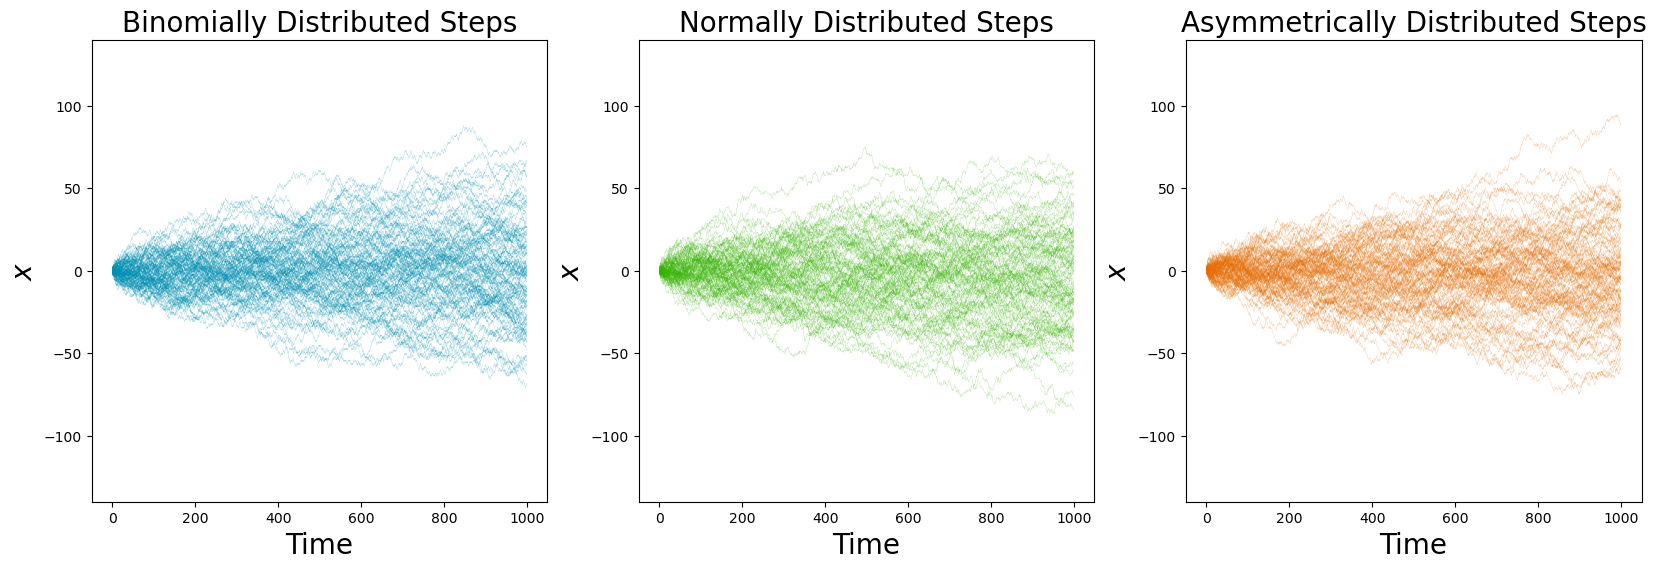

In [30]:
x = [np.cumsum(r1,axis=0),np.cumsum(r2,axis=0),np.cumsum(r3,axis=0)] # Computing trajectories from random numbers
plt.figure(figsize=(20,6))

for subplot,trajectories in zip([1,2,3],x):
    plt.subplot(1,3,subplot)
    plt.plot(trajectories[:,:100],linewidth=0.1,color=C[subplot-1]) 
    plt.ylim([-140, 140])
    plt.xlabel(r"Time",fontsize=20)
    plt.ylabel('$x$',fontsize=20)
    plt.title(cases[subplot-1], fontsize=20)

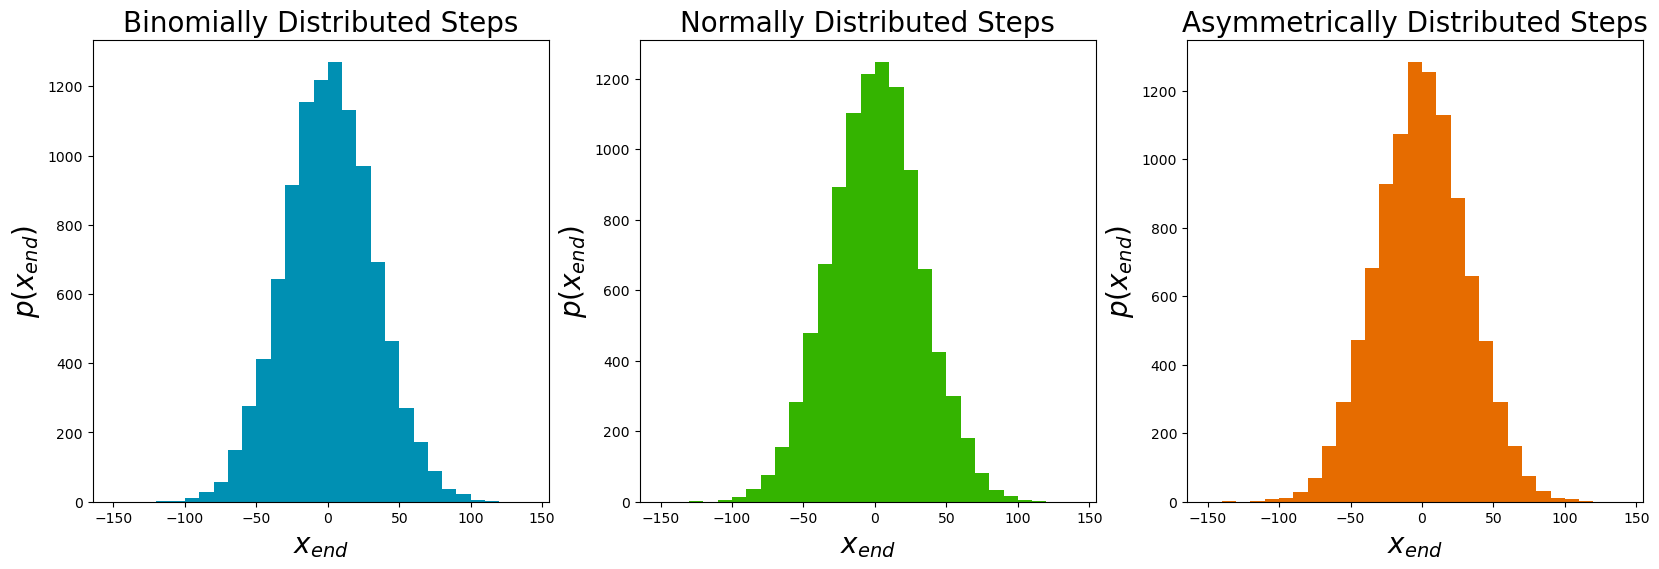

In [31]:
# 5.1. b)
plt.figure(figsize=(20,6))

l = np.arange(-15,15)*10
for subplot,trajectories in zip([1,2,3],x):
    plt.subplot(1,3,subplot)
    plt.hist(trajectories[999,:],l,color=C[subplot-1])
    plt.xlabel(r"$x_{end}$",fontsize=20)
    plt.ylabel('$p(x_{end})$',fontsize=20)
    plt.title(cases[subplot-1], fontsize=20)
    
# the distributions are not normalized

# 5.2

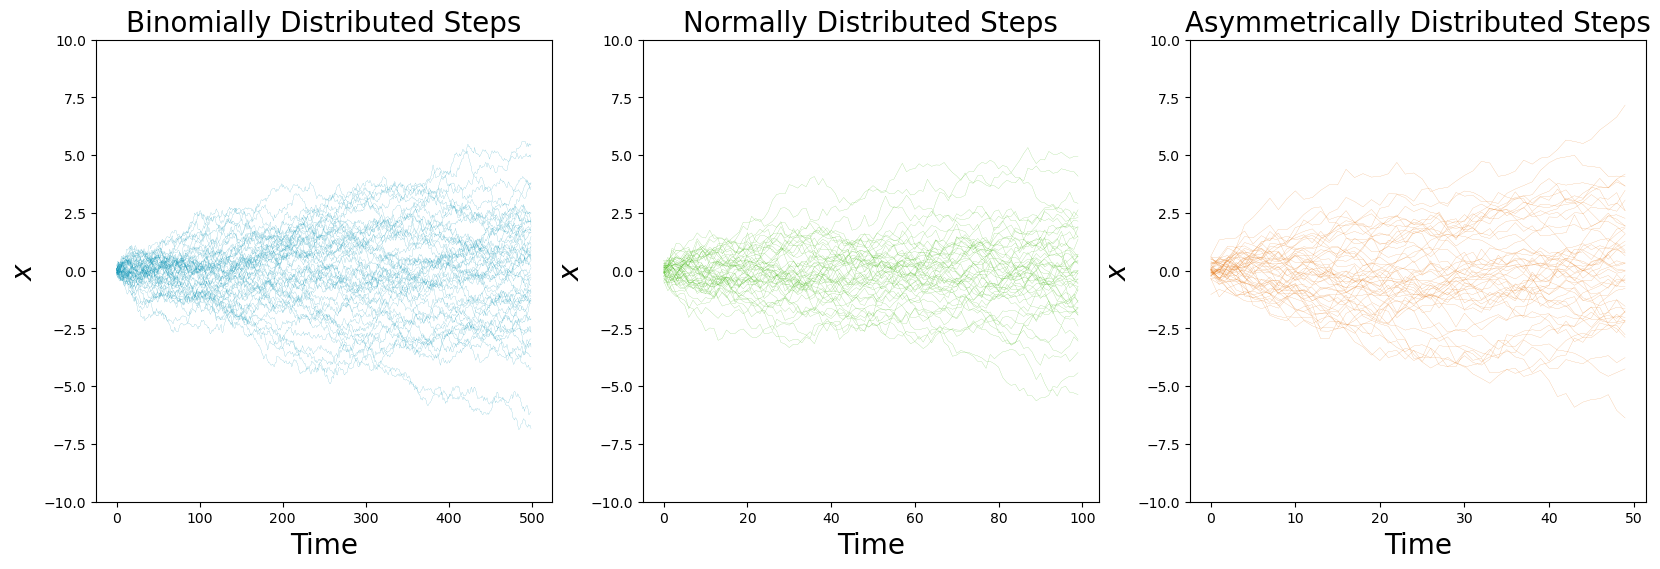

In [33]:
timeTotal = 5
nParticles = 50                                                                       
timeStep_1 = 0.01 
timeStep_2 = 0.05
timeStep_3 = 0.1
nSteps_1 = int(timeTotal/0.01)
nSteps_2 = int(timeTotal/0.05)
nSteps_3 = int(timeTotal/0.1)

r1 = (np.random.randn(nSteps_1,nParticles))*np.sqrt(timeStep_1)
r2 = (np.random.randn(nSteps_2,nParticles))*np.sqrt(timeStep_2)
r3 = (np.random.randn(nSteps_3,nParticles))*np.sqrt(timeStep_3)

C = ['#0090B3','#34B400','#E66C00']

x = [np.cumsum(r1,axis= 0),np.cumsum(r2,axis=0),np.cumsum(r3,axis=0)]          
plt.figure(figsize=(20,6))

for subplot,trajectories in zip([1,2,3],x):
    plt.subplot(1,3,subplot)
    plt.plot(trajectories[:,:],linewidth=0.1,color=C[subplot-1]) 
    plt.ylim([-10, 10])
    plt.xlabel(r"Time",fontsize=20)
    plt.ylabel('$x$',fontsize=20)
    plt.title(cases[subplot-1], fontsize=20)

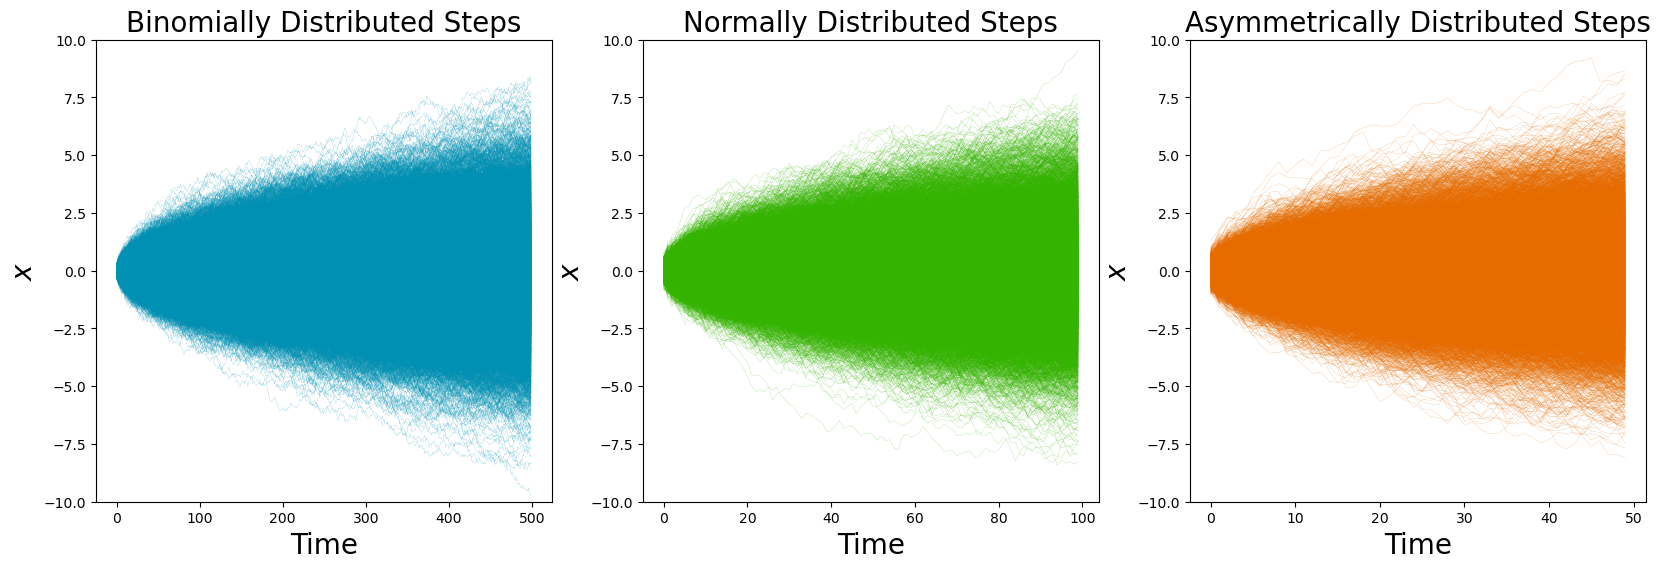

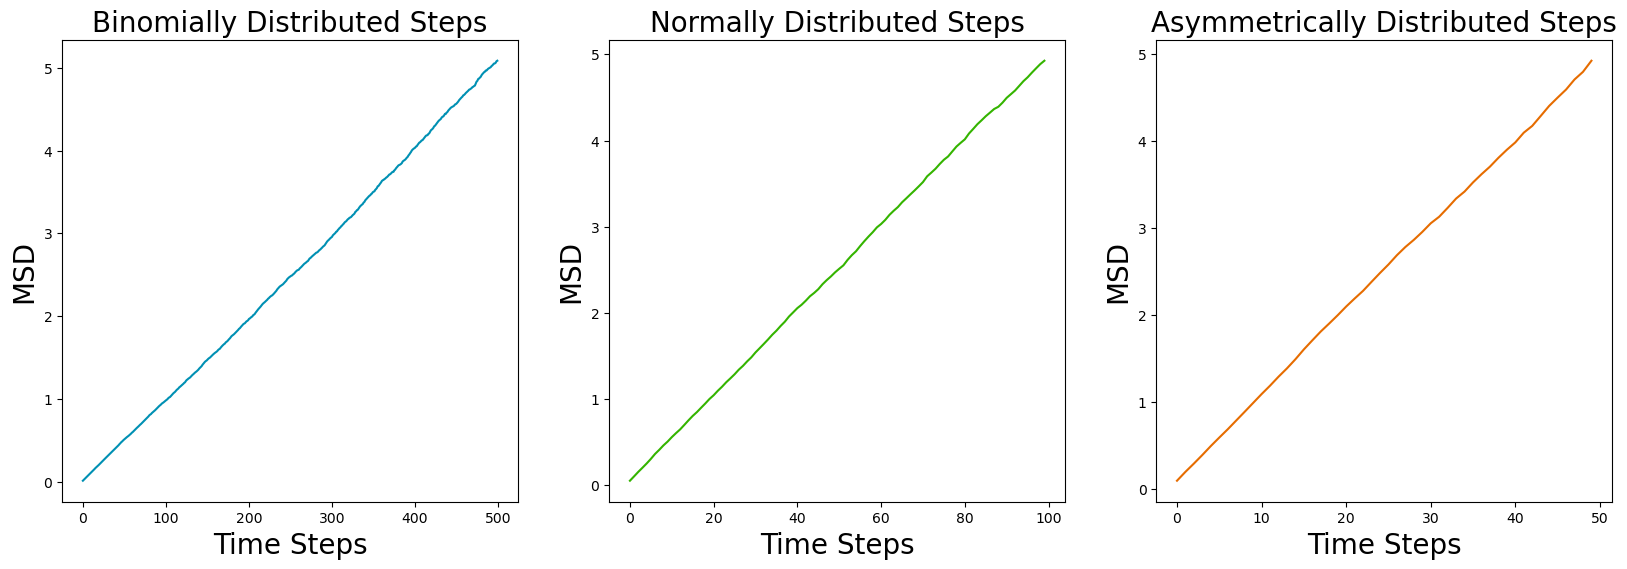

In [40]:
timeTotal = 5
nParticles = 10000                                                                       
timeStep_1 = 0.01 
timeStep_2 = 0.05
timeStep_3 = 0.1
nSteps_1 = int(timeTotal/0.01)
nSteps_2 = int(timeTotal/0.05)
nSteps_3 = int(timeTotal/0.1)

r1 = (np.random.randn(nSteps_1,nParticles))*np.sqrt(timeStep_1)
r2 = (np.random.randn(nSteps_2,nParticles))*np.sqrt(timeStep_2)
r3 = (np.random.randn(nSteps_3,nParticles))*np.sqrt(timeStep_3)

C = ['#0090B3','#34B400','#E66C00']

x = [np.cumsum(r1,axis= 0),np.cumsum(r2,axis=0),np.cumsum(r3,axis=0)]          
plt.figure(figsize=(20,6))

for subplot,trajectories in zip([1,2,3],x):
    plt.subplot(1,3,subplot)
    plt.plot(trajectories[:,:10000],linewidth=0.1,color=C[subplot-1]) 
    plt.ylim([-10, 10])
    plt.xlabel(r"Time",fontsize=20)
    plt.ylabel('$x$',fontsize=20)
    plt.title(cases[subplot-1], fontsize=20)

# since <x>=0, Var=<x^2>
Var1 = x[0]**2
MSD1 = []
t = int(len(Var1))
for i in range(t):
    MSD1.append(np.mean(Var1[i,:]))

Var2 = x[1]**2    
MSD2 = []
t = int(len(Var2))
for i in range(t):
    MSD2.append(np.mean(Var2[i,:]))

Var3 = x[2]**2    
MSD3 = []
t = int(len(Var3))
for i in range(t):
    MSD3.append(np.mean(Var3[i,:]))    

MSD = [MSD1,MSD2,MSD3]  
plt.figure(figsize=(20,6))

for subplot,trajectories in zip([1,2,3],MSD):
    plt.subplot(1,3,subplot)
    plt.plot(trajectories,color=C[subplot-1]) 
    plt.xlabel(r"Time Steps",fontsize=20)
    plt.ylabel('MSD',fontsize=20)
    plt.title(cases[subplot-1], fontsize=20)

# 5.3

Text(0.5, 1.0, 'Trajectories for a Duration of 100τ')

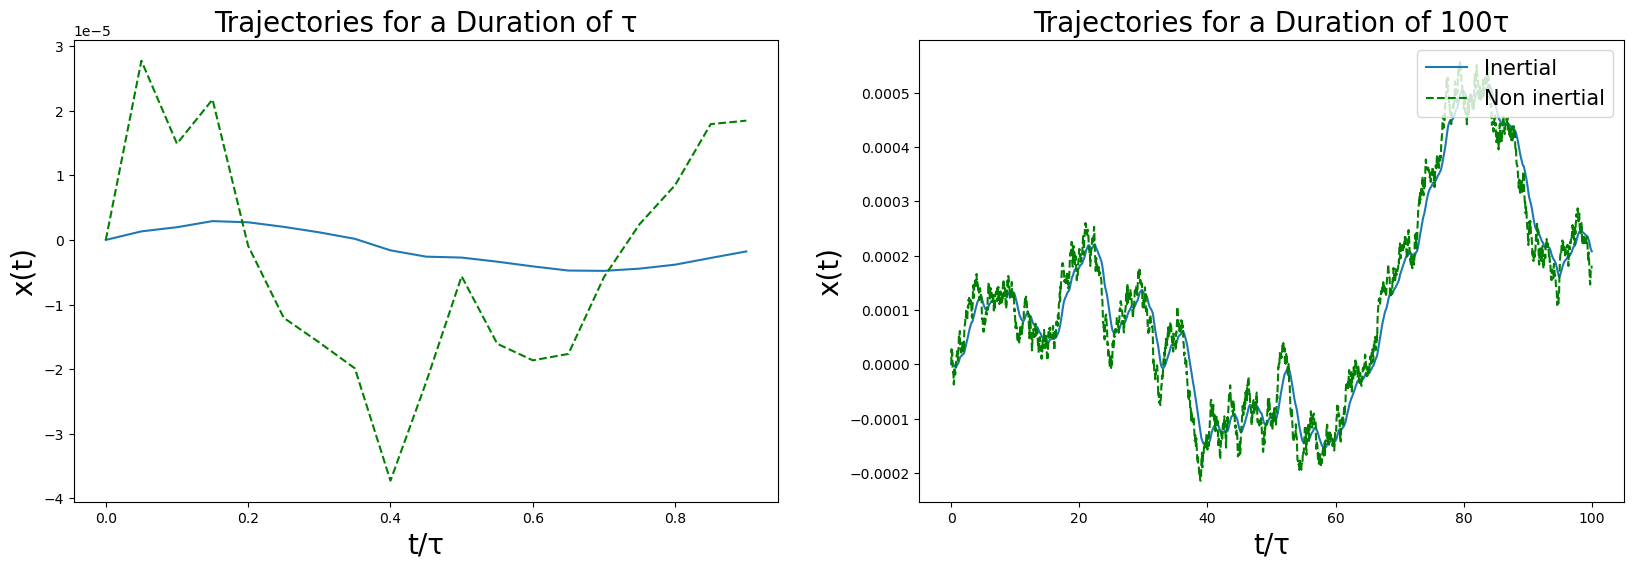

In [69]:
# 5.3. a)

import numpy as np
from matplotlib import pyplot as plt 

# particle properties
radius = 10**(-6)                # m
mass = 1.11 * 10**(-14)   # kg

# environment properties
eta = 0.001                                                     # N/s
kBoltzmann = 1.38 * 10**(-23)                                   # J/K
temperature = 300                                               # K
frictionCoefficient = 6 * np.pi * eta * radius                  # J/s
temperatureFactor = np.sqrt(2 * kBoltzmann * temperature)       # sqrt(J)

# time properties
momentumRelaxationTime = mass/frictionCoefficient
timeTotal = 100 * momentumRelaxationTime
timeStep = 0.05 *momentumRelaxationTime 
nSteps = int(timeTotal/timeStep)

def massless_displacement(r1,w):
    xNext = r1[-1] + np.sqrt(temperatureFactor * timeStep / frictionCoefficient) * w
    r1.append(xNext)
    return r1

def mass_displacement(r2,w):
    denominator = 1 + (timeStep/momentumRelaxationTime)
    factor1 = (1 + denominator) / denominator
    factor2 = -1/denominator
    factor3 = np.sqrt(temperatureFactor * frictionCoefficient * timeStep**3) / (mass * denominator)
    xNext = factor1 * r2[-1] + factor2 * r2[-2] + factor3 * w
    r2.append(xNext)
    return r2

r1 = [0,0]
r2 = [0,0]
timeRatio = [0,0]
for i in range(nSteps):
    w = np.random.randn()
    r1 = massless_displacement(r1,w)
    r2 = mass_displacement(r2,w)
    timeRatio.append(((i+1) * timeStep) / momentumRelaxationTime)

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)    
plt.plot(timeRatio[0:20],r2[0:20])
plt.plot(ratio[0:20],r1[0:20],color='green', linestyle='dashed')
plt.xlabel('t/τ', fontsize=20)
plt.ylabel('x(t)', fontsize=20)
plt.title('Trajectories for a Duration of τ', fontsize=20)

plt.subplot(1,2,2)
plt.plot(timeRatio,r2,label="Inertial")
plt.plot(timeRatio,r1,color='green',linestyle='dashed',label="Non inertial")
plt.legend(loc="upper right", fontsize=15)
plt.xlabel('t/τ', fontsize=20)
plt.ylabel('x(t)', fontsize=20)
plt.title('Trajectories for a Duration of 100τ', fontsize=20)


Text(0.5, 1.0, 'Mean Square Displacement for Different Timescales')

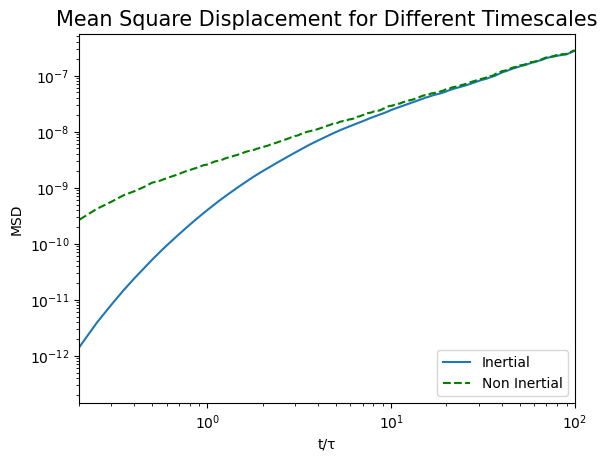

In [70]:
#5.3. b)

nParticles = 1000

x1 = []
x2 = []
for j in range(nParticles):
    r1 = [0,0]
    r2 = [0,0]
    for i in range(nSteps):
        w = np.random.randn()
        r1 = massless_displacement(r1,w)
        r2 = mass_displacement(r2,w)

    x1.append(r1)
    x2.append(r2)

x1 = np.array(x1)
x2 = np.array(x2)

var1 = x1**2
var2 = x2**2

MSD1 = [0,0]
for i in range(nSteps):
    MSD1.append(np.mean(var1[:,i]))
    
MSD2 = [0,0]
for i in range(nSteps):
    MSD2.append(np.mean(var2[:,i]))
    
plt.loglog(ratio,MSD2,label="Inertial")
plt.loglog(ratio,MSD1,color='green', linestyle='dashed',label="Non Inertial")
plt.legend(loc="lower right")
plt.xlim(0.20,100)
plt.xlabel('t/τ')
plt.ylabel('MSD')
plt.title('Mean Square Displacement for Different Timescales', fontsize=15)


# 5.4

Text(0.5, 1.0, 'Brownian Motion of an Optically Trapped Particle')

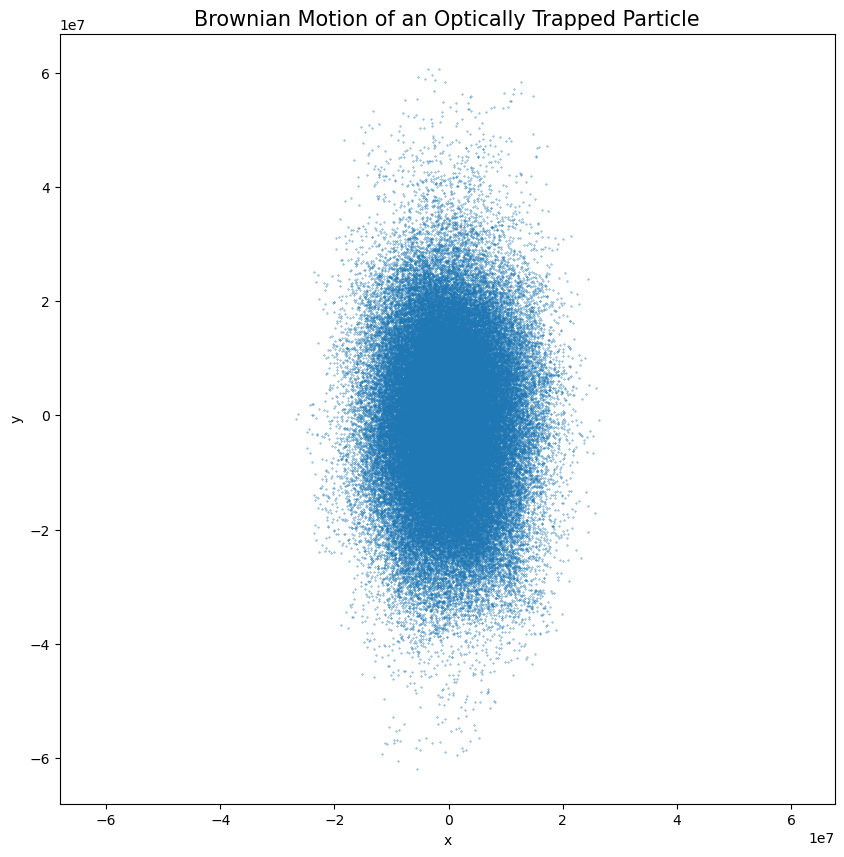

In [96]:
# 5.4. a)
xStiffness = 10**(-6)         # N/m           
yStiffness = 0.25 * 10**(-6)  # N/m

nSteps = int(1e5)           
timeStep = 1e-3               # s            

x = np.zeros(nSteps)    
y = np.zeros(nSteps)    
Wx = np.random.randn(nSteps) 
Wy = np.random.randn(nSteps) 

for i in range(nSteps-1):
    x[i+1] = (1 - (xStiffness * timeStep / frictionCoefficient)) * x[i] + np.sqrt(temperatureFactor * timeStep / frictionCoefficient) * Wx[i]  
    y[i+1] = (1 - (yStiffness * timeStep / frictionCoefficient)) * y[i] + np.sqrt(temperatureFactor * timeStep / frictionCoefficient) * Wy[i]  

plt.figure(figsize=(10,10))
plt.plot(x*1e9,y*1e9,'.',markersize=0.6)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Brownian Motion of an Optically Trapped Particle', fontsize=15)


In [1]:
# 5.4. b)
nSteps = 100000
beta = 1/(kBoltzmann * temperature)
e = 2.71828

xPotential = np.zeros(nSteps)
yPotential = np.zeros(nSteps)
systemPotential = np.zeros(nSteps)

xBoltzmann = np.zeros(nSteps)
yBoltzmann = np.zeros(nSteps)
distribution = np.zeros(nSteps)

x = np.zeros(nSteps)    
y = np.zeros(nSteps)    
Wx = np.random.randn(nSteps) 
Wy = np.random.randn(nSteps) 

for i in range(nSteps-1):
    x[i+1] = (1 - (xStiffness * timeStep / frictionCoefficient)) * x[i] + np.sqrt(temperatureFactor * timeStep / frictionCoefficient) * Wx[i]  
    y[i+1] = (1 - (yStiffness * timeStep / frictionCoefficient)) * y[i] + np.sqrt(temperatureFactor * timeStep / frictionCoefficient) * Wy[i]  
    
    xPotential[i+1] = (xStiffness * ((x[i+1])**2) / 2)
    yPotential[i+1] = (yStiffness * ((y[i+1])**2) / 2)

    # The internal energy is an extensive quantity, thus U(r) = U(x)+U(y) = (kx + ky)(x^2 + y^2)/2
    systemPotential[i+1] = (xStiffness + yStiffness) * (x[i+1]**2 + y[i+1]**2) / 2

    # The system's distribution will now be linear to exp[-βU(r)]
    distribution[i+1] = np.exp(-beta * systemPotential[i+1])

xExponent = -beta * xPotential 
xBoltzmann = e**(xExponent)

yExponent = -beta * yPotential 
yBoltzmann = e**(yExponent)

distribution[i+1] = np.exp(-beta * systemPotential[i+1])

plt.subplot(1,1,1)    
plt.plot(x, xBoltzmann)
plt.plot(y, yBoltzmann, color='green')
plt.xlabel('x, y', fontsize=20)
plt.ylabel('Boltzmann Distribution along x and y', fontsize=10)
plt.title('Boltzmann Distribution', fontsize=10)


NameError: name 'kBoltzmann' is not defined

Text(0.5, 1.0, 'Position Variance with Stiffness')

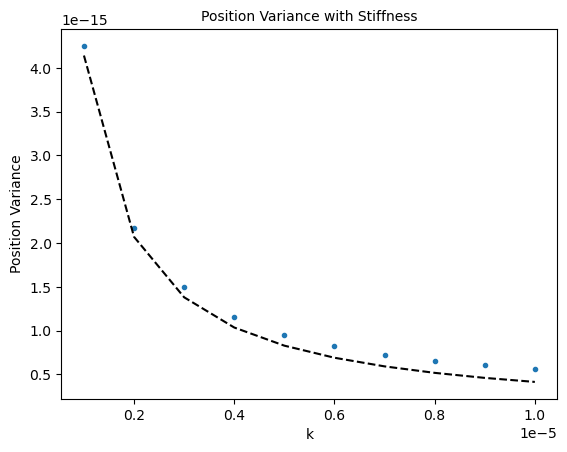

In [190]:
# 5.4.d) 
import statistics

kx = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]        # pN/μm 

kBoltzmann = 1.38e-23
temperature = 300 
R = 1e-6               
frictionCoefficient = 0.006*np.pi*R  
nSteps = int(1e5)          
timeStep = 1e-3              
temperatureFactor = 2*temperature*kBoltzmann


x = np.zeros(nSteps)
Wx = np.random.randn(nSteps)
varX = []
varTh = []

for k in kx:
    xStiffness = k * 10**(-6)               # N/m
    varTh.append((kBoltzmann * temperature / xStiffness))
    for i in range(nSteps-1):
        x[i+1] = (1 - (xStiffness * timeStep / frictionCoefficient)) * x[i] + np.sqrt(temperatureFactor * timeStep / frictionCoefficient) * Wx[i] 
    varX.append(statistics.pvariance(x))
kx = np.array(kx)

plt.plot(kx*1e-6,varX,'.',label = 'x')
plt.plot(kx*1e-6,varTh,'k--',label = 'Theory')
plt.xlabel('k')
plt.ylabel('Position Variance')
plt.title('Position Variance with Stiffness', fontsize=10)


In [192]:
!jupyter nbconvert --to webpdf --allow-chromium-download Brownian.ipynb

[NbConvertApp] Converting notebook Brownian.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1660517 bytes to Brownian.pdf
